In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "../../data/raw/tunisia-real-estate.csv"  # Adjust the path if necessary
df = pd.read_csv(data_path)

# Preview the dataset
print(df.head())
print(df.info())  # Get column details


   Unnamed: 0  Delegation        Locality Nature        Type of Real Estate  \
0           0          82  Sidi El Bechir   Sale           2-room apartment   
1           1          12        La Marsa   Sale           3-room apartment   
2           2          28    Ariana Ville   Sale           2-room apartment   
3           3          77        Ettahrir   Sale  5-room apartment and more   
4           4          12        La Marsa   Sale           3-room apartment   

   Surface     Price Inserted On  
0     70.0  120000.0  06/10/2023  
1    130.0  277000.0  23/10/2023  
2    111.0  195000.0  09/11/2023  
3    150.0  268000.0  13/11/2023  
4    134.0  340000.0  08/11/2023  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2353 non-null   int64  
 1   Delegation           2353 non-null   int64  
 2   Loca

In [4]:
df = df.drop(columns=['Unnamed: 0'])


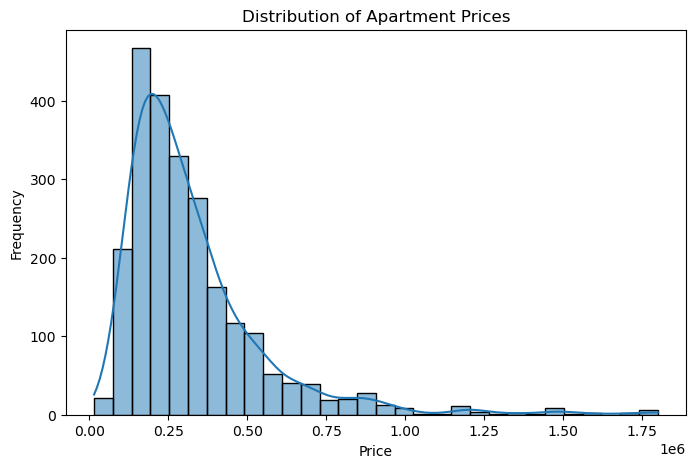

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Apartment Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


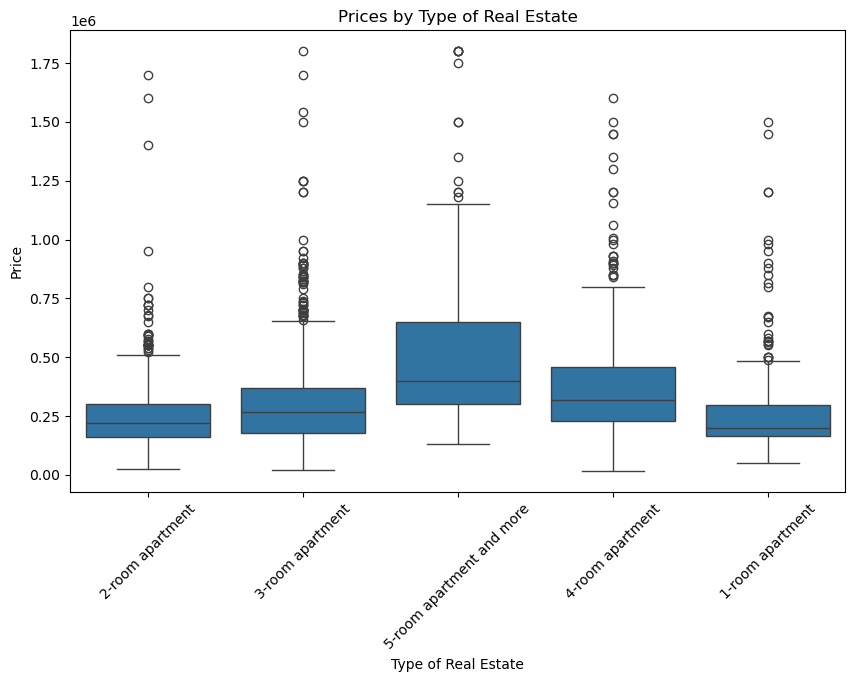

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type of Real Estate', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Prices by Type of Real Estate')
plt.show()


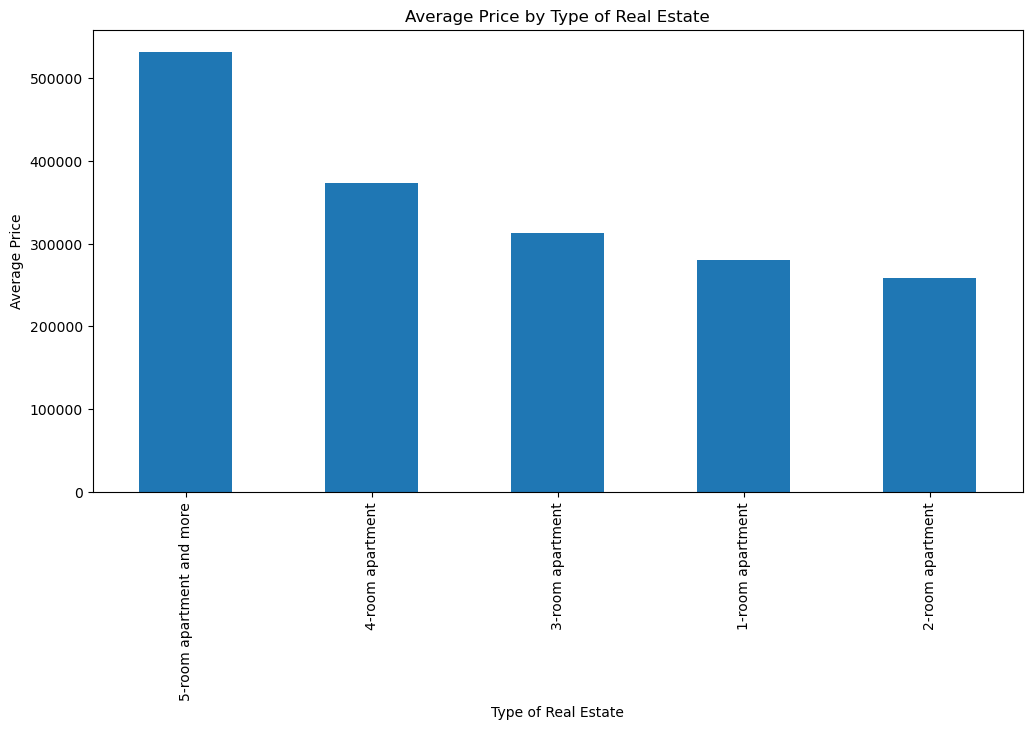

In [7]:
avg_prices = df.groupby('Type of Real Estate')['Price'].mean().sort_values(ascending=False)
avg_prices.plot(kind='bar', figsize=(12, 6), title='Average Price by Type of Real Estate')
plt.ylabel('Average Price')
plt.show()


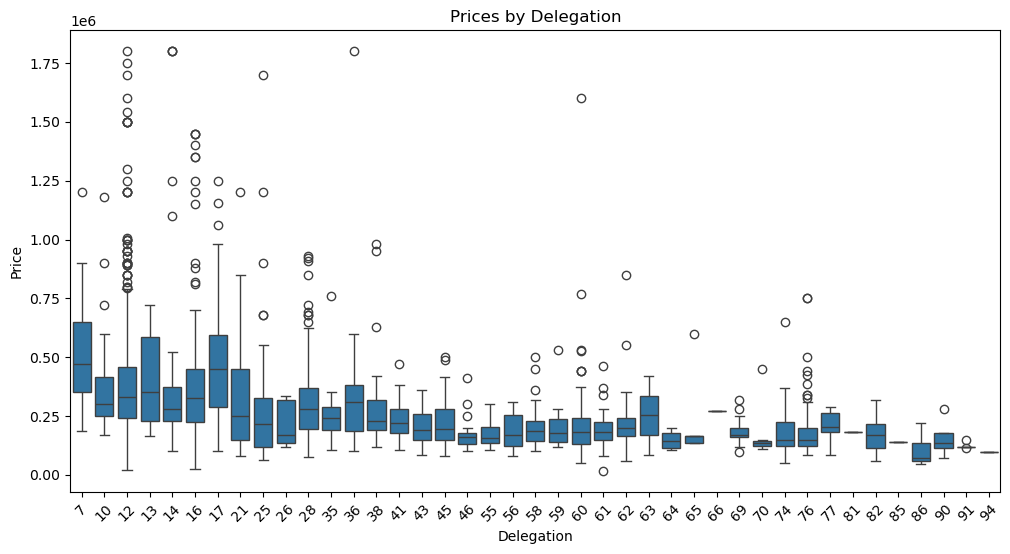

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Delegation', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Prices by Delegation')
plt.show()


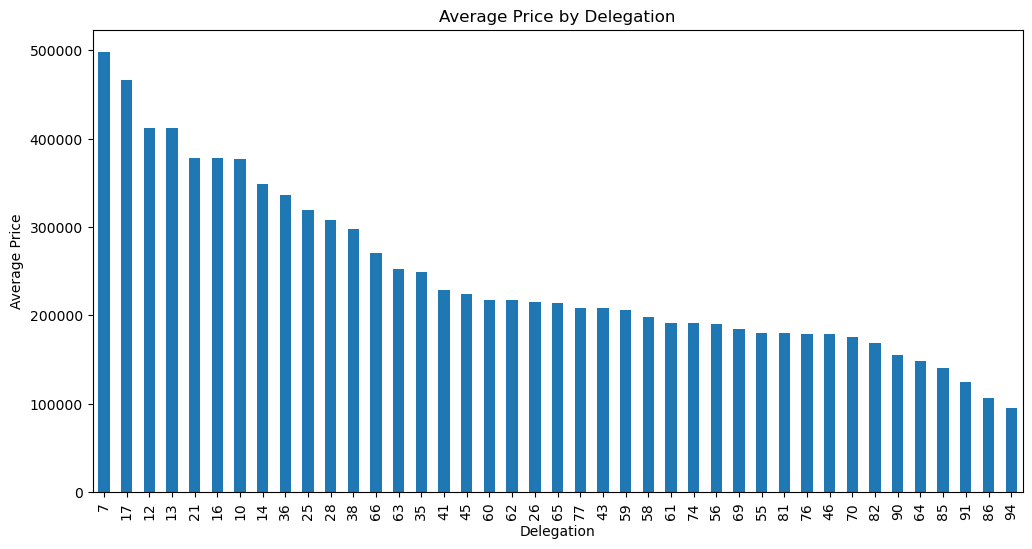

In [9]:
avg_prices = df.groupby('Delegation')['Price'].mean().sort_values(ascending=False)
avg_prices.plot(kind='bar', figsize=(12, 6), title='Average Price by Delegation')
plt.ylabel('Average Price')
plt.show()


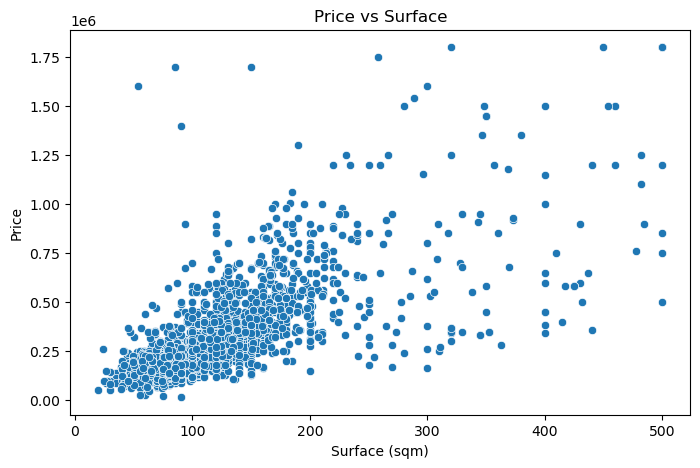

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Surface', y='Price', data=df)
plt.title('Price vs Surface')
plt.xlabel('Surface (sqm)')
plt.ylabel('Price')
plt.show()


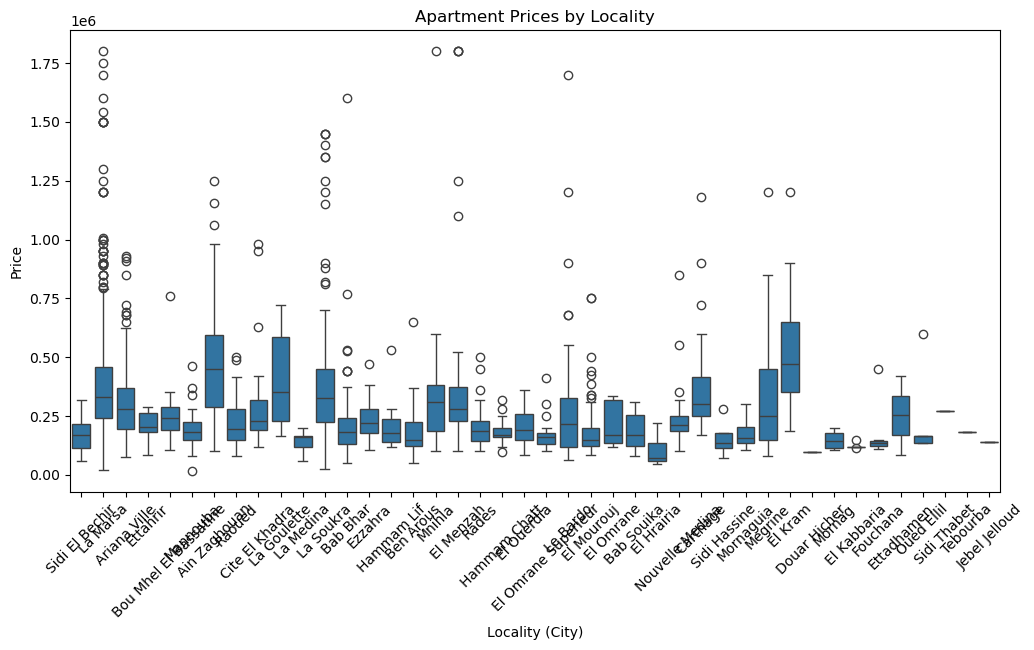

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Locality', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Apartment Prices by Locality')
plt.xlabel('Locality (City)')
plt.ylabel('Price')
plt.show()


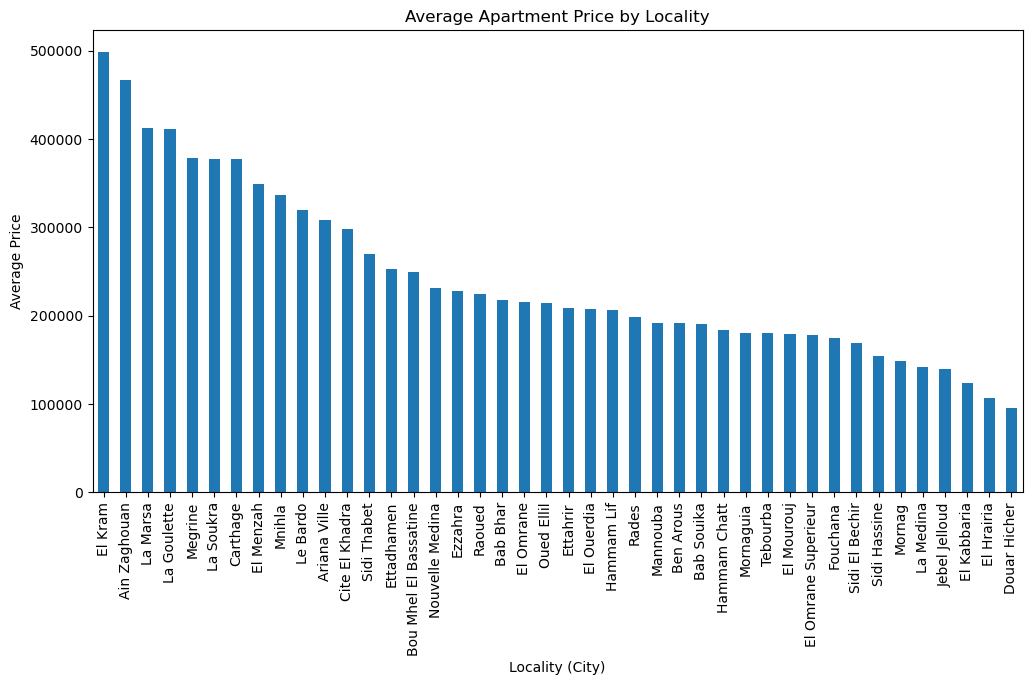

In [5]:
# Group by Locality and calculate the average price
avg_price_locality = df.groupby('Locality')['Price'].mean().sort_values(ascending=False)

# Plot the average prices
avg_price_locality.plot(kind='bar', figsize=(12, 6), title='Average Apartment Price by Locality')
plt.ylabel('Average Price')
plt.xlabel('Locality (City)')
plt.show()


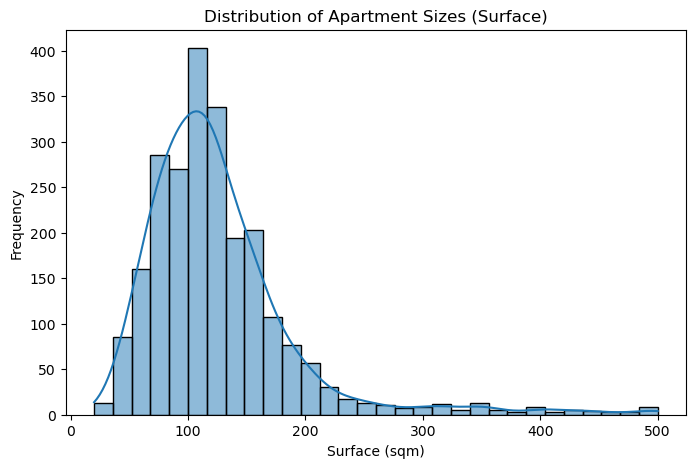

In [3]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Surface'], bins=30, kde=True)
plt.title('Distribution of Apartment Sizes (Surface)')
plt.xlabel('Surface (sqm)')
plt.ylabel('Frequency')
plt.show()


In [4]:
print(df['Surface'].describe())


count    2353.000000
mean      126.159371
std        66.228607
min        20.000000
25%        85.000000
50%       114.000000
75%       150.000000
max       500.000000
Name: Surface, dtype: float64


In [5]:
df['Inserted On'] = pd.to_datetime(df['Inserted On'], format='%d/%m/%Y')
print(df['Inserted On'].dtypes)


datetime64[ns]


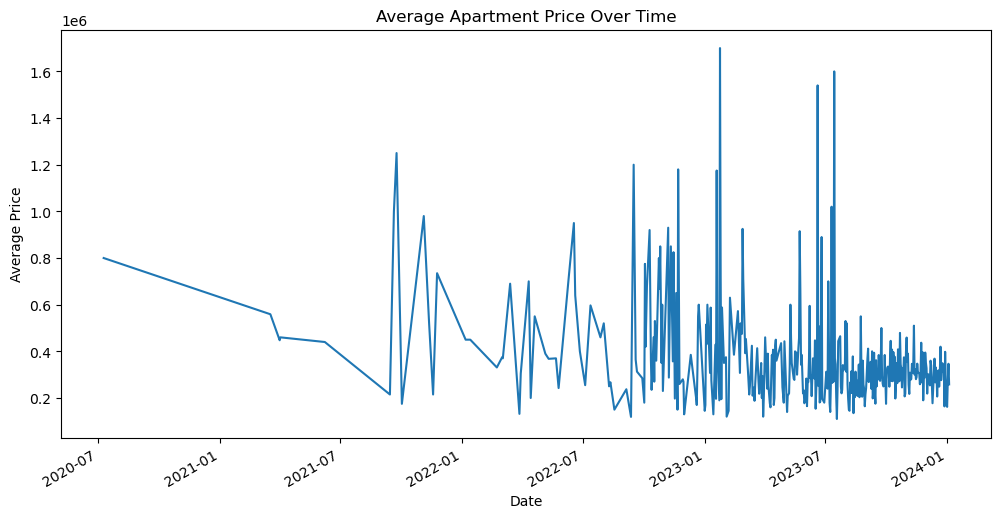

In [6]:
avg_price_by_date = df.groupby('Inserted On')['Price'].mean()

# Plot
avg_price_by_date.plot(figsize=(12, 6), title='Average Apartment Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()


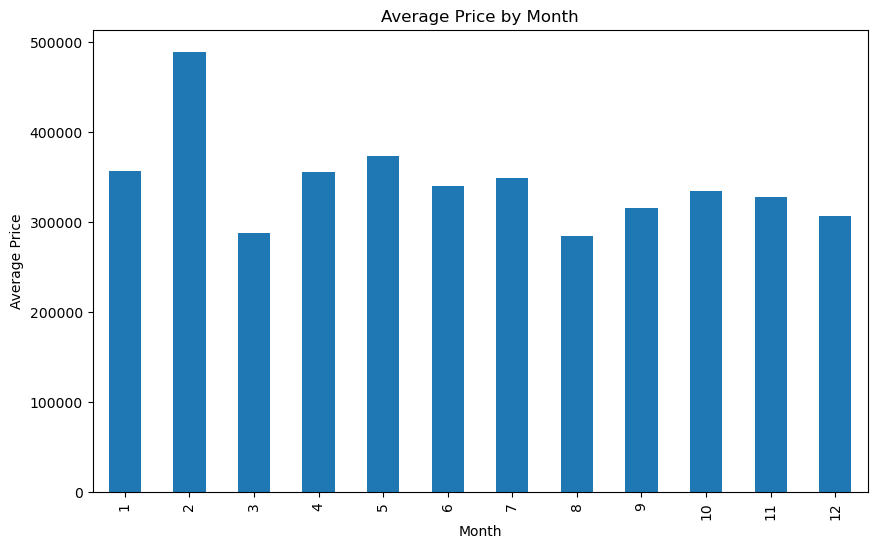

In [7]:
df['Month'] = df['Inserted On'].dt.month
avg_price_by_month = df.groupby('Month')['Price'].mean()

# Plot
avg_price_by_month.plot(kind='bar', figsize=(10, 6), title='Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()


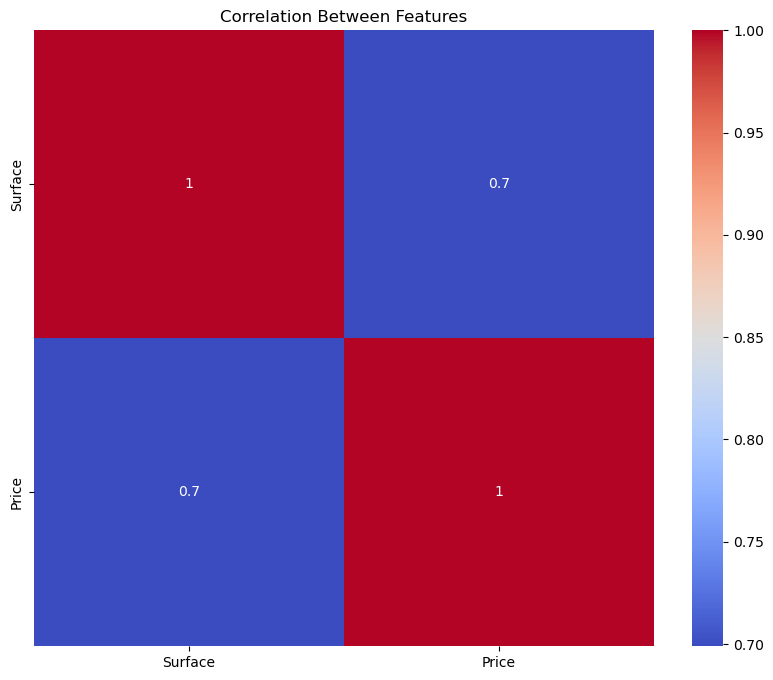

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Surface', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


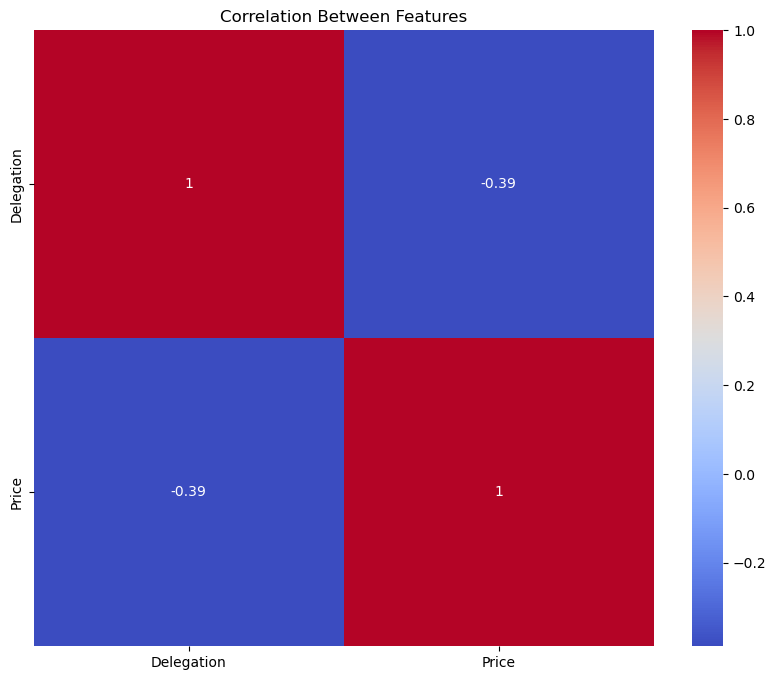

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Delegation', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


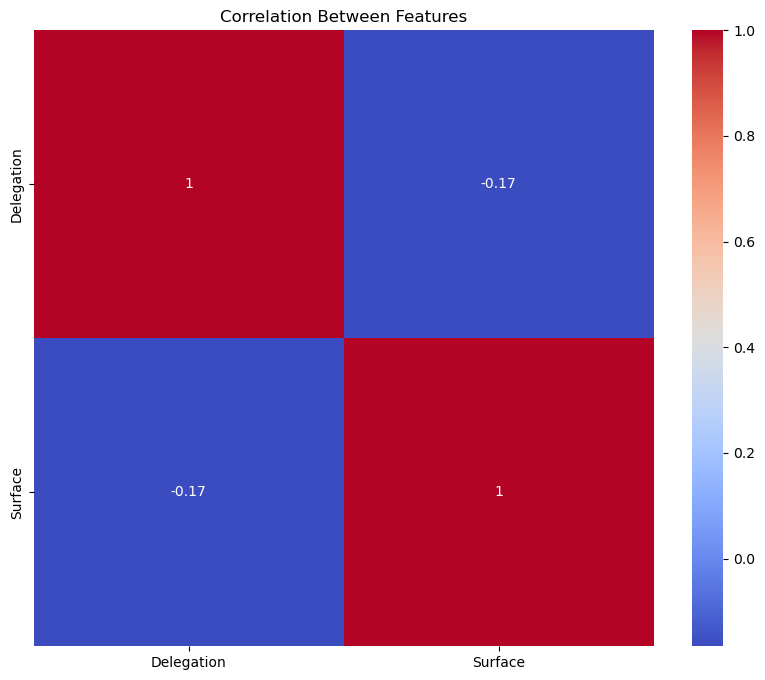

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Delegation', 'Surface']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


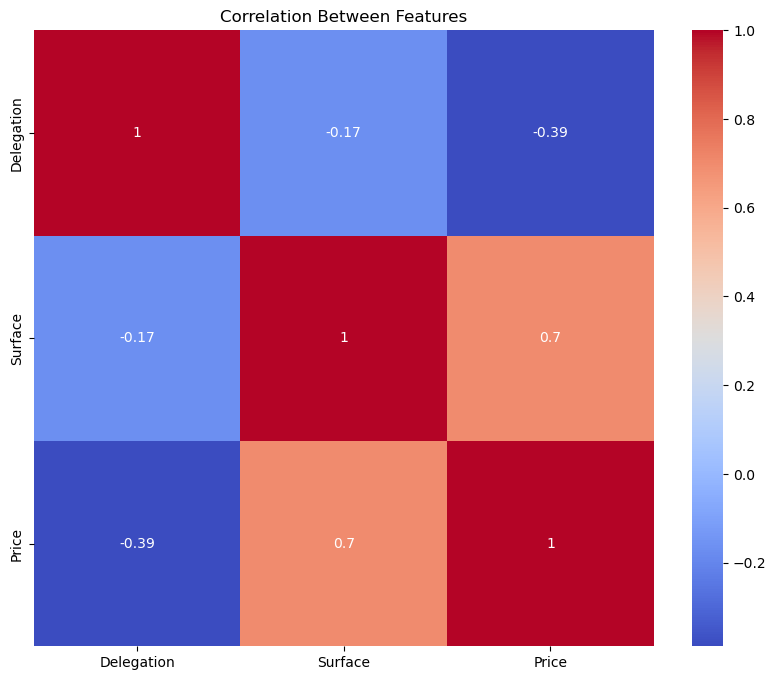

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Delegation', 'Surface', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


In [12]:
# Grouped averages for key fields
grouped = df.groupby(['Delegation', 'Locality', 'Type of Real Estate'])['Price'].mean().reset_index()
print(grouped.sort_values(by='Price', ascending=False).head(10))


    Delegation      Locality        Type of Real Estate         Price
38          21       Megrine  5-room apartment and more  1.200000e+06
61          36        Mnihla  5-room apartment and more  1.090000e+06
23          14     El Menzah  5-room apartment and more  7.803571e+05
13          12      La Marsa  5-room apartment and more  7.767368e+05
4            7       El Kram  5-room apartment and more  6.992857e+05
28          16     La Soukra  5-room apartment and more  6.950000e+05
43          25      Le Bardo  5-room apartment and more  6.366667e+05
33          17  Ain Zaghouan  5-room apartment and more  6.300000e+05
0            7       El Kram           1-room apartment  6.191000e+05
8           10      Carthage  5-room apartment and more  6.150000e+05


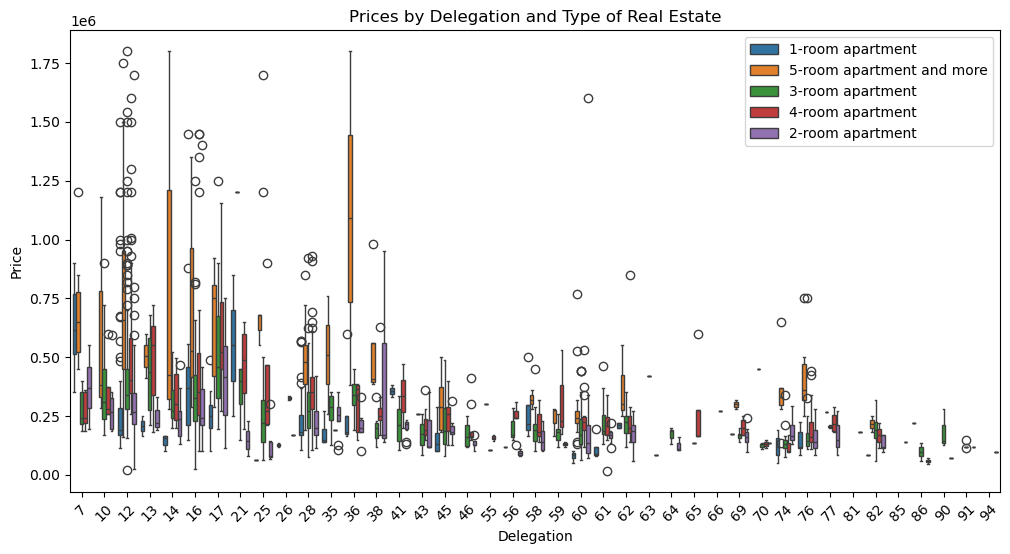

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Delegation', y='Price', hue='Type of Real Estate', data=df)
plt.xticks(rotation=45)
plt.title('Prices by Delegation and Type of Real Estate')
plt.legend(loc='upper right')
plt.show()


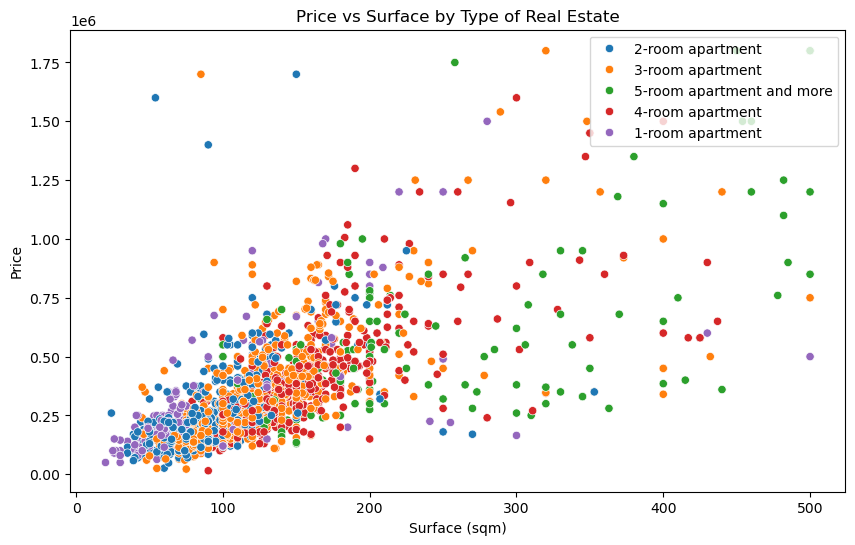

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Surface', y='Price', hue='Type of Real Estate', data=df)
plt.title('Price vs Surface by Type of Real Estate')
plt.xlabel('Surface (sqm)')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()


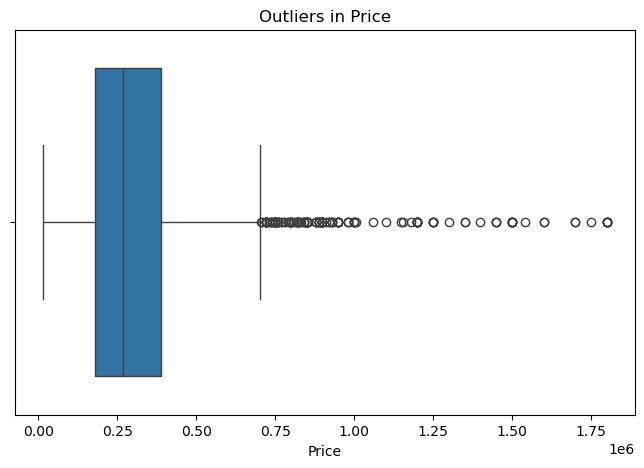

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'])
plt.title('Outliers in Price')
plt.show()


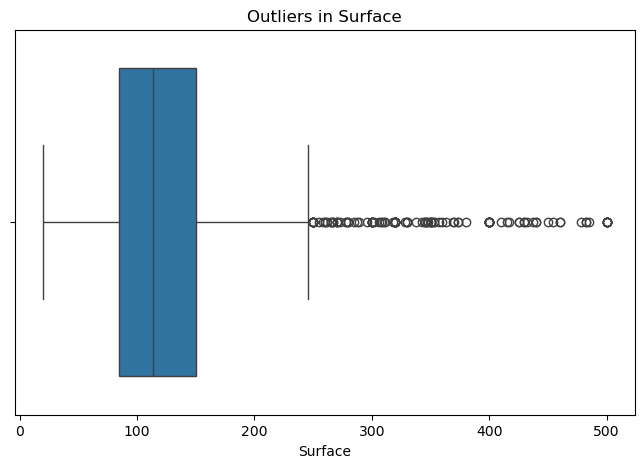

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Surface'])
plt.title('Outliers in Surface')
plt.show()
